In [1]:
#模型保存  架构 权重  回调函数的保存  自定义模型保存   整体架构的保存

In [1]:
import tensorflow as tf
import os
print("Tensorflow version:{}".format(tf.__version__))

Tensorflow version:2.0.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(train_image,train_label),(test_image,test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
train_image.shape

(60000, 28, 28)

In [5]:
train_label.shape

(60000,)

In [6]:
test_image.shape,test_label.shape

((10000, 28, 28), (10000,))

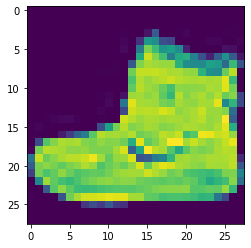

In [7]:
plt.imshow(train_image[0])

In [8]:
np.max(train_image[0])

255

In [9]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
train_image = train_image/255
test_image = test_image/255  #归一化处理

In [11]:
train_image.shape

(60000, 28, 28)

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

2021-11-19 17:29:12.833818: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-19 17:29:12.833842: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-19 17:29:12.833882: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mi-HP-ProDesk-680-G6-PCI-Microtower-PC): /proc/driver/nvidia/version does not exist
2021-11-19 17:29:12.834090: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-11-19 17:29:12.837888: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2899885000 Hz
2021-11-19 17:29:12.838151: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55b8e4a8c390 executing comp

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["acc"])

In [16]:
model.fit(train_image,train_label,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4945 - acc: 0.8270
Epoch 2/3
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3736 - acc: 0.8641
Epoch 3/3
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3337 - acc: 0.8783


In [17]:
model.evaluate(test_image,test_label,verbose=0)

[0.36883706929683685, 0.8647]

In [18]:
#1.模型的整体保存 权重值 模型配置 优化器配置  设置检查点 稍后从完全状态继续训练 无需访问原始代码
model.save("less_model.h5") #hdf5 是保存的基本格式   目前保存在当前路径的less_model 文件

In [19]:
#以后如何使用模型 加载就行
new_model = tf.keras.models.load_model("less_model.h5")

In [21]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [22]:
new_model.evaluate(test_image,test_label,verbose=0)  #可见结果一致  权重完全相同

[0.36883706929683685, 0.8647]

In [23]:
#只保存模型架构
json_config = model.to_json()


In [24]:
json_config

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Flatten", "config": {"name": "flatten", "trainable": true, "batch_input_shape": [null, 28, 28], "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": 

In [26]:
#重建模型
reinitalized_model = tf.keras.models.model_from_json(json_config)

In [27]:
reinitalized_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [28]:
reinitalized_model.evaluate(test_image,test_label,verbose=0)#没有配置和训练

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [29]:
reinitalized_model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["acc"])

In [30]:
reinitalized_model.evaluate(test_image,test_label,verbose=0)

[2.4386163722991943, 0.0404]

In [34]:
#只保存模型的权重 不考虑模型的框架
weights = model.get_weights()

In [35]:
weights

[array([[ 0.03498909,  0.02754167,  0.01419325, ...,  0.01515384,
          0.00287122, -0.01639309],
        [ 0.06342033,  0.10014813, -0.09023377, ...,  0.08796076,
         -0.08161245, -0.10007311],
        [ 0.11379308, -0.06903213, -0.01163419, ...,  0.11133079,
          0.08197153, -0.17810833],
        ...,
        [ 0.109231  ,  0.02158348, -0.00081118, ..., -0.05722786,
          0.01459199, -0.02115029],
        [ 0.00110223, -0.06721625, -0.11059475, ..., -0.12928893,
         -0.03507368,  0.05579888],
        [ 0.04081593, -0.07992846, -0.01125868, ...,  0.04941183,
          0.01818619,  0.05098635]], dtype=float32),
 array([ 0.41557255,  0.43741366,  0.15342861, -0.02853623,  0.02487368,
        -0.12246306, -0.01799118,  0.36121488,  0.09773422, -0.01416309,
         0.15038657, -0.03164763,  0.09264109,  0.37610695,  0.18730083,
        -0.00859833,  0.3287927 ,  0.15724176, -0.31597263, -0.03097254,
        -0.00541536,  0.39066803, -0.02429009,  0.06412885,  0.097

In [37]:
reinitalized_model.set_weights(weights)  #使用保存好的权重

In [38]:
reinitalized_model.evaluate(test_image,test_label,verbose=0)

[0.36883706929683685, 0.8647]

In [39]:
#array 格式不利于保存在磁盘上使用其他命令
model.save_weights("less_weights.h5")

In [41]:
#使用权重
reinitalized_model.load_weights("less_weights.h5")

In [42]:
reinitalized_model.evaluate(test_image,test_label,verbose=0)

[0.36883706929683685, 0.8647]

In [2]:
#在训练期间或训练结束自动保存检查点 可从上次暂停的位置重新训练以防训练过程中断 回调函数tf.keras.callbacks.ModelCheckpoint

In [16]:
checkpoint_path = "training_cp/cp.ckpt"

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                save_weights_only=True)

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

2021-11-23 15:01:40.667661: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-23 15:01:40.667678: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-23 15:01:40.667689: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mi-HP-ProDesk-680-G6-PCI-Microtower-PC): /proc/driver/nvidia/version does not exist
2021-11-23 15:01:40.667782: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-11-23 15:01:40.688446: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2899885000 Hz
2021-11-23 15:01:40.688858: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5583862a2e30 executing comp

In [13]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["acc"])

In [14]:
model.evaluate(test_image,test_label,verbose=0)

[2.477570721435547, 0.1298]

model.load_weights(checkpoint_path)

In [17]:
model.load_weights(checkpoint_path)

In [18]:
model.evaluate(test_image,test_label,verbose=0)

[0.38227319135665894, 0.8614]

In [18]:
model.fit(train_image,train_label,epochs=3,callbacks=[cp_callback])

2021-11-23 14:59:47.045336: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 376320000 exceeds 10% of system memory.


Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 2s 39us/sample - loss: 0.5043 - acc: 0.8240
Epoch 2/3
60000/60000 [==============================] - 2s 25us/sample - loss: 0.3820 - acc: 0.8620
Epoch 3/3
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3427 - acc: 0.8763
